## Tarea 17 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 13 de diciembre.

## Lista de preguntas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("mammography.csv")

In [3]:
objetivo = data['class']

In [4]:
objetivo.value_counts()

'-1'    10923
'1'       260
Name: class, dtype: int64

In [5]:
y = (objetivo != "'-1'").astype(np.int)

In [6]:
X = data.iloc[:, :-1]
X.shape

(11183, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7e67b59b0>,
      dtype=object)

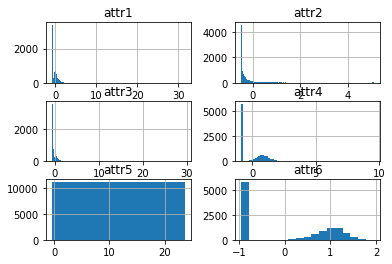

In [7]:
X.hist(bins='auto')

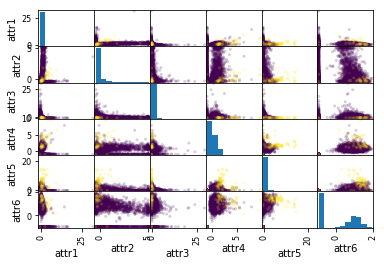

In [8]:
pd.plotting.scatter_matrix(X, c=y, alpha=.2);

In [9]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X.values, y.values, stratify=y, random_state=0)

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

puntuaciones = cross_validate(LogisticRegression(),
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9196227166963687, 0.6294963938533346)

In [11]:
from sklearn.ensemble import RandomForestClassifier
puntuaciones = cross_validate(RandomForestClassifier(n_estimators=100),
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9388344663644729, 0.7286393506050097)

### Uso del toolbox para un  conjunto de datos desbalanceados  en machine learning

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)
X_entrenamiento_submuestra, y_entrenamiento_submuestra = rus.fit_sample(X_entrenamiento, y_entrenamiento)
print(X_entrenamiento.shape)
print(X_entrenamiento_submuestra.shape)
print(np.bincount(y_entrenamiento_submuestra))

(8387, 6)
(390, 6)
[195 195]


In [13]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline

pipe_submuestra = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())
puntuaciones = cross_validate(pipe_submuestra,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9146979814686811, 0.533875247329146)

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_entrenamiento_sobremuestra, y_entrenamiento_sobremuestra = ros.fit_sample(X_entrenamiento, y_entrenamiento)
print(X_entrenamiento.shape)
print(X_entrenamiento_sobremuestra.shape)
print(np.bincount(y_entrenamiento_sobremuestra))

(8387, 6)
(16384, 6)
[8192 8192]


In [15]:
pipe_sobremuestra = make_imb_pipeline(RandomOverSampler(), LogisticRegression())
puntuaciones = cross_validate(pipe_sobremuestra,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9178415995821323, 0.5884876034802164)

In [16]:
pipe_rf_submuestra = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier(n_estimators=100))
puntuaciones = cross_validate(pipe_rf_submuestra,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9510638462949117, 0.5995449040744286)

In [17]:
pipe_rf_sobremuestra = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier(n_estimators=100))
puntuaciones = cross_validate(pipe_rf_sobremuestra,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9201366896368501, 0.6965734978781212)

#### Pesos de las clases

In [18]:
puntuaciones = cross_validate(LogisticRegression(class_weight='balanced'),
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

(0.9175679201521627, 0.5874608083830397)

In [19]:
puntuaciones = cross_validate(RandomForestClassifier(n_estimators=100, class_weight='balanced'),
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), scores['test_average_precision'].mean()

NameError: name 'scores' is not defined

#### Conjuntos remuestreados

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
rf_remuestreo = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto'),
                                         n_estimators=100, random_state=0)

In [ ]:
puntuaciones = cross_validate(rf_remuestreo,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

In [ ]:
lr_remuestreo = BalancedBaggingClassifier(LogisticRegression(),
                                         n_estimators=100, random_state=0)

puntuaciones= cross_validate(lr_remuestreo,
                        X_entrenamiento, y_entrenamiento, cv=10, scoring=('roc_auc', 'average_precision'))
puntuaciones['test_roc_auc'].mean(), puntuaciones['test_average_precision'].mean()

1. Considera dos o tres de los modelos y estrategias anteriores, ejecute grid-search (optimizando `roc_auc` o la `precisión promedio`) y dibuja las curvas roc y las curvas PR para estos modelos.

In [ ]:
# Tu solucion

2. Presentar un reporte del siguiente artículo: [Handling imbalanced datasets: A review ](https://pdfs.semanticscholar.org/95df/dc02010b9c390878729f459893c2a5c0898f.pdf) :

In [ ]:
# Tu respuesta